# i. Curse of Dimensionality

The Curse of Dimensionality **refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces that do not occur in low-dimensional settings** such as the three-dimensional physical space of everyday experience. It gives rise to following problems:

**i.i Increase in Computation time:** Majority of the machine learning algorithms rely on the calculation of distances for model building and as the number of dimensions increases it becomes more and more computation-intensive to create a model out of it.

**i.ii Hard (or almost impossible) to visualise the relationship between features:** We as humans are bound by the perception of a max of three dimensions. We can't comprehend things beyond three dimnesions. Say, we have 1000 features in the dataset. That results in a total (1000*999)/2= 499500 combinations possible for creating the 2-D graph.

Questions that need to be asked when facing such a quandary include:

- Are all the features really contributing to decision making?
- Is there a way to come to the same conclusion using a lesser number of features?
- Is there a way to combine features to create a new feature and drop the old ones?
- Is there a way to remodel features in a way to make them visually comprehensible?

**PCA** -- a dimensionality reduction technique -- waltz in as our saviour.

## ii. PCA -- a dimensionality reduction technique

PCA (Principal Component Analysis) is **a dimensionality reduction technique -- not an elimination one -- using which we can reduce the number of features to be used for building the models without losing a significant meaning (or variation) of the data**.**

**It essentially reduces the degree of freedom of the dataset avoiding chances of overfitting.**

**General Idea:** Here in PCA, the general idea is to take couple of features at a time and workaroud them in such a way that they can be represented by lesser number of features without losing too much variation from the original dataset.

There are two approaches to implement PCA:

- **SVD (Singular Value Decomposition)**: Here, PCA can be done by the singular value decomposition of a data matrix.<br><br>

- **Eigen-decomposition of Σ**: PCA can be done by eigenvalue decomposition of a data covariance (or correlation) matrix.


### ii.i Principal Components

Now let's talk about the **Principal Components** from the PCA. **They are derived features which explain the maximum variance in the data.** The first component explains the maximum variance of the data, the second a bit less and the third a bit lesser and it goes on and on.

**Each of the new dimensions found using PCA is a linear combination of the old features.**


### ii.ii Steps involved in PCA implementing SVD

Let's have a look at **how two features at a given instace can be represented by a single one** -- **Principal Component** -- via PCA using SVD:

### Step i. Parallel Translation

Straight off the bat, PCA is gonna standard normalize our data such that its mean=0 and s.d=1. This is also called **Parallel Translation** or Standardization. **The main reason for normalization is to ensure that features with larger scales do not dominate the analysis**, but in some cases this may not be a concern.

### Step ii. Direction in which data varies the most

Now to find out a single feature representing two features at a time, PCA will find a kinda **"best fitted line"** representing features X1 and X2. **It finds the direction in which the data varies the most, and the line in that very direction will be the first principal component**.

### Step iii. Finding the best fitted line, and apparently the Principal Components

Now, to find out that best fitted line, PCA starts off with a line in any initial direction passing through the origin and iteratively update it to converge to the first principal compomnent by calculating the summission of squares of distances between the datapoints and their projections on those random lines. Whichever line will have the least said distances computed altogether, will be finalized as the PC1.

**To ease up the calculations**, instead of computing the distances between the projections and the datapoints, PCA calculates the distances of those projections from the origin and accordingly deems the PC1 the one with having the maximum said distance from the origin.

**The variance of the data projected onto PC1, which is equal to the sum of squares of distances between the projections and the origin, is know as Eigen Value for PC1.** Similarly, the eigenvalue for PC2 is the variance of the data projected onto PC2, and so on.

### Step iv.

Now to find out the PC2, it draws a perpendicular line to PC1 through the origin and similarly perpendicular line to both PC1 and PC2, to get the PC3 and so on.

### Step v. Optimal number of Principal Components

Now, the optimal number of PCs can be chosen based on the variance each PC accounts for, known as **Explained Variance Ratio**. The graph representing the explained variance ratios each PC holds on to is known as **Scree Plot**.

**The optimal number of PCs to retain depends on the specific application and the desired trade-off between explained variance and dimensionality reduction.**

The Scree Plot can be a useful tool for visualizing the amount of variance explained by each PC, but it is not always clear where to set the cutoff. Other methods, such as cross-validation or information criteria, may be used to determine the optimal number of PCs.

## 0.0 Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

# 1.0 PCA Manual Implementation

## 1.1 Preparing a 'dummy' dataset

In [2]:
A = np.array([
    [3, 7],
    [-4, -6],
    [7, 8],
    [1, -1], 
    [-4, -1],
    [-3, -7]
])

A

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [3]:
df = pd.DataFrame(A, columns=['A0', 'A1'])
df

,A0,A1
0,3,7
1,-4,-6
2,7,8
3,1,-1
4,-4,-1
5,-3,-7


**Note:** It is essential to **standardize** the data before applying PCA in order to ensure that the resulting principal components are not affected by differences in the scale or units of the original features. This step is particularly important for addressing issues related to parallel translation of the data.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

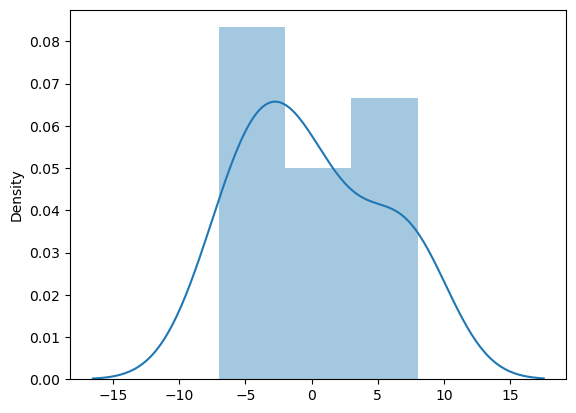

In [4]:
sns.distplot(df)

## 1.2 Covariance

**Covariance** indicates the measure of linear relationship between two variables. 

In addition to its standard computation, **covariance can also be computed as the multiplication of a given matrix containing two variables (i.e., two columns) by its transpose and divided by the size of the dataset minus one (i.e., n-1). This formula is used to compute the sample covariance**. 

The **sample covariance** is an estimate of the true population covariance, based on a sample of the data. The reason for dividing by n-1 instead of n is to correct for the fact that **using a sample instead of the entire population tends to underestimate the true covariance**.

In [5]:
df.cov()

,A0,A1
A0,20.0,25.0
A1,25.0,40.0


In [6]:
A

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [7]:
## Also, Covariance = Transposeof(A) * A / n-1

sigma = A.T @ A/ (len(A)-1)
sigma

## DOING NOTHING BUT REPRESENTING THE LINEAR RELATION BW TWO VARIABLES!

array([[20., 25.],
       [25., 40.]])

In [8]:
## Computing the eigenvalues and right eigenvectors of a square array i.e. the `Cov` matrix here 

np.linalg.eig(sigma)

(array([ 3.07417596, 56.92582404]),
 array([[-0.82806723, -0.56062881],
        [ 0.56062881, -0.82806723]]))

In [9]:
## Computing the eigenvalues and right eigenvectors of a square array i.e. the `Cov` matrix here 

vals, vecs = np.linalg.eig(sigma)
vals # principal components

array([ 3.07417596, 56.92582404])

**Note:** The **PC1 (First Principal Component)** will be the one with the higher val of Lambda.

In [10]:
vals # EigenVals

array([ 3.07417596, 56.92582404])

In [11]:
pd.DataFrame(vecs) # EigenVecs

,0,1
0,-0.828067,-0.560629
1,0.560629,-0.828067


## 1.3 Principal Components

### 1.3.1 First Principal Component, PC1

In [12]:
# First Principal Component, PC1

print("The PC1: ")
A @ vecs[:, 1]  # because of the higher eigen value

The PC1: 


array([ -7.47835704,   7.21091862, -10.54893951,   0.26743842,
         3.07058247,   7.47835704])

### 1.3.2 Here, why are we multiplying with 'Eigen Vector' rather than 'Eigen Value'?

Because up until now your interpretation of eigen stuff was entirely wrong.

An **Eigen Vector** or **"characteristic vector of a linear tranformation"** is a non-zero vector **that changes atmost by a scalar factor (results in a scalar multiple of itself)** when that linear transformation is applied to it.

    A * v = lambda * v

where, <br>**A** is the **square matrix**, <br>**v** is the **EigenVector**, <br>and **lambda** is the **EigenValue**.

### 1.3.2 Second Principal Component, PC2

In [13]:
## Second Principal Component, PC2

print("The PC2: ")
A @ vecs[:, 0]  # because of the lower eigen value

The PC2: 


array([ 1.44019997, -0.05150393, -1.31144014, -1.38869604,  2.75164011,
       -1.44019997])

In [14]:
pd.DataFrame(A).cov()

,0,1
0,20.0,25.0
1,25.0,40.0


# 2.0 Tryna replicate the above protocol on some different datasets


## 2.1 'Penguin' Dataset

In [15]:
datasets = sns.get_dataset_names()
datasets

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### 2.1.1 Loading the 'Penguin' Dataset

In [16]:
## Loading the penguin dataset

df1 = sns.load_dataset(datasets[-6])
df1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### 2.1.2 Keeping only the 'Numerical' features

In [17]:
dfx = df1.drop(columns=["species", "island", 'sex'])
dfx

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


### 2.1.3 Dataset Standardization for "Parallel Translation"

In [18]:
# Standard Normalization of the relevant features

scaler = StandardScaler()
dfx_scaled = scaler.fit_transform(dfx)

dfx1 = pd.DataFrame(dfx_scaled, columns=dfx.columns)
dfx1

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,NaN,NaN,NaN,NaN
4,-1.324737,1.089724,-0.563715,-0.938776
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,0.527932,-1.445897,1.003109,0.809516
341,1.188289,-0.735923,1.501644,1.933419
342,0.234440,-1.192335,0.789451,1.246590


In [19]:
dfx1.dropna(inplace=True)
dfx1

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
4,-1.324737,1.089724,-0.563715,-0.938776
5,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
338,0.601305,-1.750171,0.931890,0.903175
340,0.527932,-1.445897,1.003109,0.809516
341,1.188289,-0.735923,1.501644,1.933419
342,0.234440,-1.192335,0.789451,1.246590


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

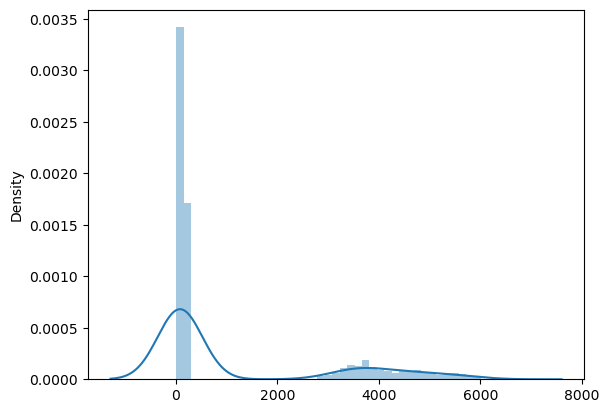

In [20]:
sns.distplot(dfx)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

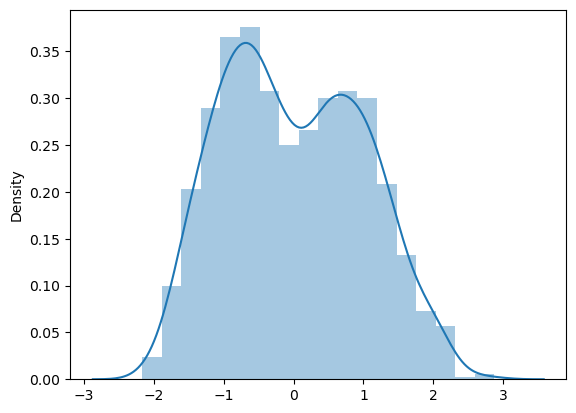

In [21]:
sns.distplot(dfx1)

In [22]:
import plotly.offline as iplot
import cufflinks as cf
cf.go_offline()

dfx.iplot(kind='hist', subplots=True)

In [23]:
dfx1.iplot(kind='hist', subplots=True)

In [24]:
dfx1.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02
mean,-9.024620e-17,-1.793562e-15,-6.395144e-16,8.894769e-17
std,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00
min,-2.168526e+00,-2.054446e+00,-2.059320e+00,-1.875362e+00
25%,-8.615697e-01,-7.866355e-01,-7.773731e-01,-8.138982e-01
50%,9.686524e-02,7.547549e-02,-2.788381e-01,-1.895079e-01
75%,8.397670e-01,7.854492e-01,8.606705e-01,6.846384e-01
max,2.875868e+00,2.205397e+00,2.142618e+00,2.620248e+00


In [25]:
dfx1.shape

(342, 4)

In [26]:
sigma = dfx1.cov()
sigma

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.002933,-0.235742,0.658106,0.596855
bill_depth_mm,-0.235742,1.002933,-0.585563,-0.473300
flipper_length_mm,0.658106,-0.585563,1.002933,0.873757
body_mass_g,0.596855,-0.473300,0.873757,1.002933


### 2.1.4 Finding the Eigen Vectors and Eigen Values to compute Principal Components

In [27]:
## Now, let's find the EigenVal and EigenVec

vals, vecs = np.linalg.eig(sigma)
vals, vecs

(array([2.76183065, 0.7747822 , 0.36630698, 0.10881037]),
 array([[-0.45525033,  0.59703114,  0.64430115,  0.14552311],
        [ 0.40033468,  0.79776657, -0.41842724, -0.16798597],
        [-0.57601332,  0.0022822 , -0.23208397, -0.78379875],
        [-0.54835019,  0.08436292, -0.59660012,  0.57988211]]))

In [28]:
vals.max()

2.761830652115729

In [29]:
vecs[:, 0]

array([-0.45525033,  0.40033468, -0.57601332, -0.54835019])

In [30]:
print(dfx.shape)
vecs[:, 0].shape

(344, 4)


(4,)

### 2.1.5 First Principal Component, PC1

In [31]:
# The First Principal Component, PC1

dfx1 @ vecs[:, 0]

0      1.843445
1      1.306762
2      1.369181
4      1.878827
5      1.911748
         ...   
338   -2.006436
340   -1.840886
341   -2.760742
342   -1.722364
343   -2.028902
Length: 342, dtype: float64

### 2.1.6 Second Principal Component, PC2

In [32]:
# PC2

dfx1 @  vecs[:, 1]

0      0.047702
1     -0.428348
2     -0.154476
4     -0.002048
5      0.829210
         ...   
338   -0.958909
340   -0.767714
341    0.288886
342   -0.704269
343    0.357620
Length: 342, dtype: float64

## 2.2 'Glass.data' dataset

### 2.2.1 Loading the 'Glass.data' dataset

In [33]:
df2 = pd.read_csv("https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv")
df2

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### 2.2.2 Keeping only 'Numerical' features

In [34]:
df2_r = df2.drop(columns=['Id number', 'Type of glass'])
df2_r

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [35]:
df2_r.iplot(kind='hist', subplots=True)

### 2.2.3 Standard Normalization of the dataset

In [36]:
# Standard Normalization

scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2_r)

df2_scaled = pd.DataFrame(df2_scaled, columns=df2_r.columns)
df2_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


### 2.2.4 Finding the Eigen Vectors and Eigen Values to compute Principal Components

In [37]:
# The Covariance matrix in order to compute the EigenVals and EigenVecs

sig = df2_scaled.cov()
sig

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.004695,-0.192786,-0.122848,-0.409238,-0.544597,-0.291193,0.814207,-0.000388,0.143681
Na,-0.192786,1.004695,-0.275017,0.157530,-0.070137,-0.267336,-0.276736,0.328136,-0.242479
Mg,-0.122848,-0.275017,1.004695,-0.484060,-0.166706,0.005421,-0.445833,-0.494573,0.083449
Al,-0.409238,0.157530,-0.484060,1.004695,-0.005550,0.327489,-0.260811,0.481655,-0.074751
Si,-0.544597,-0.070137,-0.166706,-0.005550,1.004695,-0.194239,-0.209712,-0.102631,-0.094643
K,-0.291193,-0.267336,0.005421,0.327489,-0.194239,1.004695,-0.319328,-0.042818,-0.007755
Ca,0.814207,-0.276736,-0.445833,-0.260811,-0.209712,-0.319328,1.004695,-0.113371,0.125555
Ba,-0.000388,0.328136,-0.494573,0.481655,-0.102631,-0.042818,-0.113371,1.004695,-0.058967
Fe,0.143681,-0.242479,0.083449,-0.074751,-0.094643,-0.007755,0.125555,-0.058967,1.004695


In [38]:
# Finding the Principal axes

vals2, vecs2 = np.linalg.eig(sig)
vals2, vecs2

(array([2.52295323e+00, 2.05969694e+00, 1.41143951e+00, 1.16329842e+00,
        9.18293337e-01, 5.30112353e-01, 3.70690643e-01, 6.41527269e-02,
        1.61637096e-03]),
 array([[-0.54517662,  0.28568318,  0.08691083, -0.14738099,  0.0735427 ,
         -0.11528772, -0.08186724, -0.7522159 ,  0.02573194],
        [ 0.2581256 ,  0.27035007, -0.38491962, -0.49124204, -0.1536833 ,
          0.55811757, -0.14858006, -0.12769315, -0.31193718],
        [-0.11088095, -0.59355826,  0.00841796, -0.37878577, -0.12350912,
         -0.30818598,  0.20604537, -0.07689061, -0.57727335],
        [ 0.42870863,  0.29521154,  0.32923712,  0.13750592, -0.01410888,
          0.01885731,  0.69923557, -0.27444105, -0.19222686],
        [ 0.22883635, -0.15509891, -0.45870884,  0.65253771, -0.00850012,
         -0.08609797, -0.21606658, -0.37992298, -0.29807321],
        [ 0.21934405, -0.15397013,  0.66257412,  0.03853544,  0.30703984,
          0.24363237, -0.50412141, -0.10981168, -0.26050863],
        [-0.49

### 2.2.5 First Principal Component, PC1

In [39]:
# The First Principal Component, PC1

pc1 = df2_scaled @ vecs2[:, 0]
print(type(pc1))
pc1

<class 'pandas.core.series.Series'>


0     -1.151140
1      0.574137
2      0.940160
3      0.142083
4      0.351092
         ...   
209    2.383835
210    2.397652
211    1.680246
212    2.369748
213    2.262649
Length: 214, dtype: float64

In [40]:
vals2

array([2.52295323e+00, 2.05969694e+00, 1.41143951e+00, 1.16329842e+00,
       9.18293337e-01, 5.30112353e-01, 3.70690643e-01, 6.41527269e-02,
       1.61637096e-03])

In [41]:
vals2.sort()
vals2

array([1.61637096e-03, 6.41527269e-02, 3.70690643e-01, 5.30112353e-01,
       9.18293337e-01, 1.16329842e+00, 1.41143951e+00, 2.05969694e+00,
       2.52295323e+00])

### 2.2.6 Second Principal Component, PC2

In [42]:
# The Second Principal Component, PC2

pc2 = df2_scaled @ vecs2[:, 1]
print("PC2: ")
pc2

PC2: 


0     -0.529488
1     -0.759788
2     -0.929836
3     -0.961677
4     -1.091249
         ...   
209    3.061677
210    3.108236
211    3.284823
212    2.756873
213    3.028592
Length: 214, dtype: float64

In [43]:
pc1.shape

(214,)

# 3.0 Consequent Principal Axes do actually represent the original dataset

- Product of PC1 and PC2 matrices must be 0. (Property of Matrices)

- Reverse engineer the steps and see if you're able to get the original dataset.

- Cross-check with the scikit-learn's implementation.

## 3.1 Scikit-Learn's PCA implementation on 'Glass.data' dataset

### 3.1.1 Computing and cross-checking Principal Components

In [44]:
# Components: PC1 and PC2

pca = PCA(n_components=2)
comps = pca.fit_transform(df2_scaled)
comps

array([[ 1.15113957e+00, -5.29487638e-01],
       [-5.74137172e-01, -7.59787774e-01],
       [-9.40159722e-01, -9.29835966e-01],
       [-1.42083283e-01, -9.61677440e-01],
       [-3.51092291e-01, -1.09124921e+00],
       [-2.90266583e-01, -1.32400756e+00],
       [-2.52671444e-01, -1.11614958e+00],
       [-1.20299466e-01, -1.22184622e+00],
       [-2.08160308e-02, -3.21932609e-01],
       [-2.35222894e-03, -1.06581344e+00],
       [-3.82514937e-01, -1.38013403e+00],
       [-1.33538675e-02, -1.10471913e+00],
       [-3.09724390e-01, -1.42304024e+00],
       [ 1.56521013e-01, -1.23592823e+00],
       [-8.99566628e-02, -1.18125211e+00],
       [-1.15255023e-01, -1.16028212e+00],
       [ 1.73458320e-01, -1.18243967e+00],
       [ 1.45812372e+00,  9.88413780e-02],
       [ 5.47316267e-01, -2.95660130e-01],
       [-3.08817022e-01, -7.63162157e-01],
       [ 2.05673879e-01, -9.99182661e-01],
       [ 1.21605345e+00, -4.36896108e-01],
       [ 4.11679297e-02, -1.02788338e+00],
       [-1.

In [45]:
# Cross-checking

pc1_ = comps[:, 0]
pc1_ == np.array(pc1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

### 3.1.2 Explained Variance Ratio


EVR (Explained Variance Ratio) **represents the proportion of variance in the original dataset that is explained by each principal component obtained through PCA**.

    EVR = variance explained by the principal component / total variance in the original dataset
    
    Also, EVR = Eigen Vaue of the principal component / sum of all eigenvalues

In simpler terms, EVR helps us to understand how much information is retained by each principal component after the data has been transformed using PCA. A higher EVR value for a given principal component indicates that it contains more information about the original dataset. For example, an EVR of 0.8 means that the principal component explains 80% of the total variation in the original dataset.

**EVR is useful for identifying the most important principal components to retain when reducing the dimensionality of a dataset**. By retaining only the principal components with the highest EVR values, we can reduce the size of the dataset while retaining most of the important information. This can make it easier to analyze and visualize the data, while reducing the risk of overfitting or other issues related to high-dimensional data.

In [46]:
pca = PCA()
pcs = pca.fit_transform(df2_scaled)
pcs

array([[ 1.15113957, -0.52948764, -0.37209565, ..., -0.39560005,
        -0.19716008,  0.01634649],
       [-0.57413717, -0.75978777, -0.55670817, ..., -0.02415793,
        -0.28421356, -0.0107898 ],
       [-0.94015972, -0.92983597, -0.55490744, ..., -0.36751757,
        -0.09594067,  0.02164019],
       ...,
       [-1.68024627,  3.28482346, -0.93034851, ...,  0.67412231,
        -0.89170969,  0.04628358],
       [-2.36974768,  2.7568728 , -1.23470076, ...,  0.67889932,
         0.07446015, -0.02730068],
       [-2.26264885,  3.02859155, -0.89084474, ...,  0.46246107,
         0.0633149 , -0.01944978]])

In [47]:
# Explained Varaince Ratio, EVR

evrs = pca.explained_variance_ratio_
evrs

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [48]:
np.cumsum(evrs)

array([0.27901819, 0.50680399, 0.66289777, 0.79154915, 0.89310496,
       0.95173109, 0.99272647, 0.99982124, 1.        ])

### 3.1.3 Scree Plot

To confirm what number of pricipal axes is optimal, we have **Scree Plot**.

A **Scree Plot** is a graph that shows how much of the variation in a dataset is explained by each principal component obtained through PCA. It is essentially a plot of the eigenvalues of the principal components, ordered from largest to smallest.

In simple terms, the scree plot helps to identify the **number of meaningful principal components to retain in a dataset**. **As the number of components increases, the amount of variation explained by each component tends to decrease.** The scree plot can be used to determine the **"elbow point"**, which is the point at which the eigenvalues start to level off, indicating that the additional components are less meaningful in explaining the variation in the data.

By analyzing the scree plot, it is pretty much possible to determine the appropriate number of principal components to retain for further analysis. This can help to reduce the dimensionality of the dataset while retaining the most important features, making it easier to analyze and visualize the data.

Text(0.5, 1.0, 'Screen Plot')

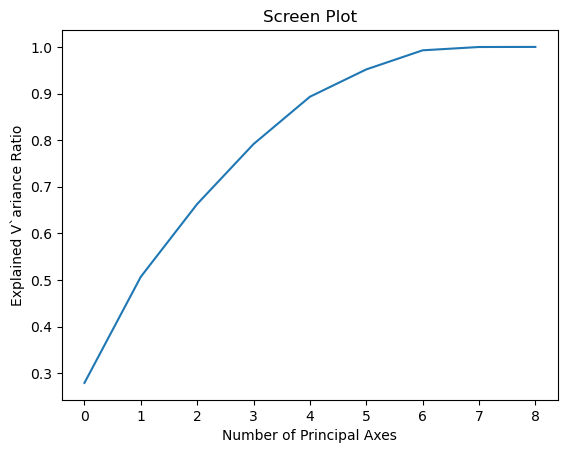

In [49]:
# Screen Plot

import matplotlib.pyplot as plt

plt.figure()
sns.lineplot(data=np.cumsum(evrs))
plt.xlabel("Number of Principal Axes")
plt.ylabel("Explained V`ariance Ratio")
plt.title("Screen Plot")